# Draw as a line plot

(0.5, -0.42681626241551124)


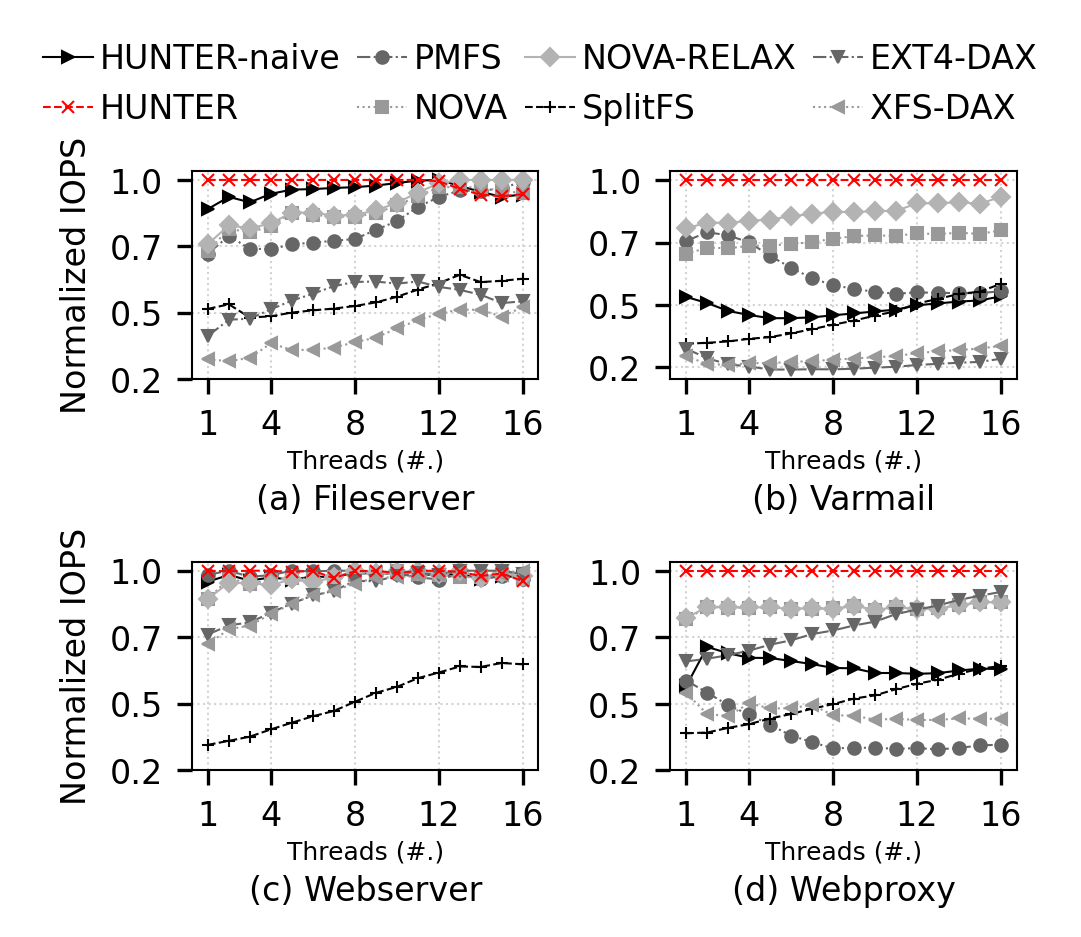

In [3]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(7)))
fig.patch.set_facecolor("white")

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":"]
subtitles = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
workloads = ["fileserver.f", "varmail.f", "webserver.f", "webproxy.f" ]
num_jobs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
for thread in num_jobs:
    for workload in workloads:
        value = df[(df['file_bench'] == workload) & (df['threads'] == thread)]['iops'] / df[(df['file_bench'] == workload) & (df['threads'] == thread)]['iops'].max()
        df.loc[(df['file_bench'] == workload) & (df['threads'] == thread), 'iops'] = value

def add_explanation_and_title(fig, ax, exp, title, title_pad=10, title_fontsize=8, exp_fontsize=6):
    lable_pad = title_pad
    ax.set_xlabel(title, fontsize=title_fontsize, labelpad=lable_pad) 
    return [exp, title, title_pad, title_fontsize, exp_fontsize]
    
def adjust_explanation(fig, axes, context):
    exp, title, title_pad, title_fontsize, exp_fontsize = context
    
    # plt.tight_layout()
    # fig.savefig("./temp.pdf", bbox_inches='tight', pad_inches=0)
    fig.savefig("./temp.pdf", bbox_inches='tight', pad_inches=0)
    # for ax in fig.axes:
        # plt.tight_layout()
        # Get the first xtick label
    midpoint = (0.5, 0.5)
    for idx, ax in enumerate(axes):
        xtick_label = ax.get_xticklabels()[0]
        label_bbox1 = xtick_label.get_window_extent()
        # print(label_bbox1)
        figure_pos1 = label_bbox1.transformed(ax.transAxes.inverted())
        
        # Get the xlabel object
        xlable = ax.xaxis.label
        label_bbox2 = xlable.get_window_extent()
        # print(label_bbox2)
        figure_pos2 = label_bbox2.transformed(ax.transAxes.inverted())
        midpoint = (0.5, (figure_pos1.y0 + figure_pos2.y1) / 2 + 0.08)
        
    print(midpoint)
    for idx, ax in enumerate(axes):
        explanation = ax.text(midpoint[0], midpoint[1], exp, ha='center', fontsize=exp_fontsize, transform=ax.transAxes)   

def zoom_in(axins, x, ys, zone_left, zone_right):
    # 坐标轴的扩展比例（根据实际数据调整）
    x_ratio = 0.1 # x轴显示范围的扩展比例
    y_ratio = 0.5 # y轴显示范围的扩展比例

    # X轴的显示范围
    xlim0 = x[zone_left]-(x[zone_right]-x[zone_left])*x_ratio
    xlim1 = x[zone_right]+(x[zone_right]-x[zone_left])*x_ratio

    stack = []
    for y in ys:
        stack.append(y[zone_left:zone_right])
    y = np.hstack(stack)
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

    # 调整子坐标系的显示范围
    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
cmap = "tab10"
for workload_id, workload in enumerate(workloads):
    subfig = plt.subplot(2, 2, workload_id + 1)
    # subfig = plt.subplot(gs0[op_idx])
    # for workload in workloads:
    #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
    
    for idx, fs in enumerate(fss):
        if fs == "HUNTER-J":
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['file_bench'] == workload)]['iops'], color="red", linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
        else:
            line, = plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['file_bench'] == workload)]['iops'], linewidth= line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        lines.append(line)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    plt.xticks([1, 4, 8, 12, 16], labels=[1, 4, 8, 12, 16], fontsize=8)
    # plt.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if workload_id == 0 or workload_id == 1:
    plt.yticks(np.linspace(0.2, 1, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    # plt.xlabel("Threads (#.)", fontsize=8) 
    # plt.title(subtitles[workload_id], fontsize=8, loc='center')
    context = add_explanation_and_title(fig, subfig, "Threads (#.)", subtitles[workload_id], title_pad=10, title_fontsize=8, exp_fontsize=6)
    if workload_id == 0 or workload_id == 2:
        plt.ylabel('Normalized IOPS', fontsize=8)

fss.replace("SplitFS-FILEBENCH", "SplitFS", inplace=True)
fss.replace("HUNTER", "HUNTER-naive", inplace=True)
fss.replace("HUNTER-J", "HUNTER", inplace=True)
fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
plt.tight_layout()
adjust_explanation(fig, fig.axes, context)
# gs0.tight_layout(fig)
plt.savefig("./FIG-Filebench.pdf", bbox_inches='tight', pad_inches=0)
